In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
import tensorflow as tf
from tensorflow.keras import models
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator

import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import splitfolders  # or import split_folders



In [10]:
input_folder = '/content/drive/MyDrive/crack'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output="/content/drive/MyDrive/crack1", 
                   seed=42, ratio=(.8, .2), 
                   group_prefix=None) # default values

Copying files: 100 files [00:23,  4.18 files/s]


In [27]:
from keras.preprocessing.image import ImageDataGenerator


In [28]:
trdata=ImageDataGenerator()
traindata=trdata.flow_from_directory(directory='/content/drive/MyDrive/crack1/train',target_size=(224,224))
tsdata=ImageDataGenerator()
testdata=tsdata.flow_from_directory(directory='/content/drive/MyDrive/crack1/val',target_size=(224,224))


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [29]:
model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)

#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dense(5, activation='softmax'))

model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

    
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 24,178,562
Trainable params: 590,850
Non-trainable params: 23,587,712
_________________________________________________________________


In [30]:
model.compile(optimizer = "adam", loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])


In [31]:
history = model.fit_generator(steps_per_epoch=10,generator=traindata,validation_data=testdata,epochs = 10,validation_steps=10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
 3/10 [========>.....................] - ETA: 2s - loss: 0.3884 - accuracy: 0.7000

10/10 [==============================] - 17s 275ms/step - loss: 0.3884 - accuracy: 0.7000 - val_loss: 0.0144 - val_accuracy: 1.0000


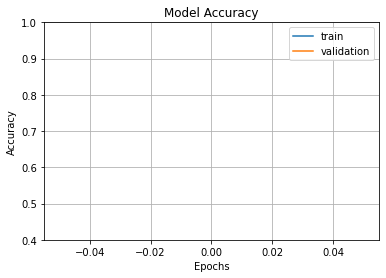

In [32]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()